# Herliana Nur Ekawati
# M07

# Data Understanding

Impor modul

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Unduh dataset dari kaggle

In [ ]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

 97% 23.0M/23.8M [00:00<00:00, 51.8MB/s]
100% 23.8M/23.8M [00:00<00:00, 43.0MB/s]


Unzip dataset

In [ ]:
!unzip -qq /content/book-recommendation-dataset.zip

Baca data menggunakan fungsi pandas.read_csv

In [ ]:
book = pd.read_csv('/content/Books.csv')
rating = pd.read_csv('/content/Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Univariate Exploratory Data Analysis

## Books

In [ ]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
book = book.rename(columns={'Book-Title': 'book_title', 'Book-Author': 'book_author', 'Year-Of-Publication': 'book_year'})

In [ ]:
print('Banyak buku: ', len(book.book_title.unique()))
print('Banyak penulis: ', len(book.book_author.unique()))
print('Judul Buku: ', book.book_title.unique())
print('Nama Penulis: ', book.book_author.unique())

Banyak buku:  242135
Banyak penulis:  102024
Judul Buku:  ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"]
Nama Penulis:  ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle']


## Ratings

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
rating = rating.rename(columns={'User-ID': 'userid', 'Book-Rating': 'book_rating'})

In [ ]:
print('Angka rating: ', rating.book_rating.unique())
print('Banyak user: ', len(rating.userid.unique()))

Angka rating:  [ 0  5  3  6  8  7 10  9  4  1  2]
Banyak user:  105283


# Data Preprocessing

Mengambil 5000 data books dan 1000 data ratings

In [ ]:
book = book[:5000]
rating = rating[:1000]

# Data preparation

## Mengatasi Missing Value

Mengecek apakah ada missing value atau tidak

In [ ]:
book.isnull().sum()

ISBN           0
book_title     0
book_author    0
book_year      0
Publisher      0
Image-URL-S    0
Image-URL-M    0
Image-URL-L    0
dtype: int64

Drop seluruh kolom yang mengandung nilai Na/Null pada books

In [ ]:
book = book.dropna()

Drop baris yang terdouble

In [ ]:
book = book.drop_duplicates()

In [ ]:
book

,ISBN,book_title,book_author,book_year,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
4995,0061043508,Strong Poison,Dorothy L. Sayers,1995,HarperTorch,http://images.amazon.com/images/P/0061043508.0...,http://images.amazon.com/images/P/0061043508.0...,http://images.amazon.com/images/P/0061043508.0...
4996,0811828964,The Bad Girl's Guide to Getting What You Want,Cameron Tuttle,2000,Chronicle Books,http://images.amazon.com/images/P/0811828964.0...,http://images.amazon.com/images/P/0811828964.0...,http://images.amazon.com/images/P/0811828964.0...
4997,0671624342,A Matter of Honor,Jeffrey Archer,1986,Simon &amp; Schuster,http://images.amazon.com/images/P/0671624342.0...,http://images.amazon.com/images/P/0671624342.0...,http://images.amazon.com/images/P/0671624342.0...
4998,0786890169,Black Water,T. Jefferson Parker,2003,Hyperion,http://images.amazon.com/images/P/0786890169.0...,http://images.amazon.com/images/P/0786890169.0...,http://images.amazon.com/images/P/0786890169.0...


Konversi data series menjadi list

In [ ]:
book_title = book['book_title'].tolist()
book_author = book['book_author'].tolist()
book_year = book['book_year'].tolist()
book_ISBN = book['ISBN'].tolist()

Membuat dictionary

In [ ]:
new_book = pd.DataFrame({
    'book_title': book_title,
    'book_author': book_author,
    'book_year': book_year,
    'book_ISBN': book_ISBN
})
new_book.head()

,book_title,book_author,book_year,book_ISBN
0,Classical Mythology,Mark P. O. Morford,2002,0195153448
1,Clara Callan,Richard Bruce Wright,2001,0002005018
2,Decision in Normandy,Carlo D'Este,1991,0060973129
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,0374157065
4,The Mummies of Urumchi,E. J. W. Barber,1999,0393045218


# Model Development dengan Content Based Filtering

Mengecek data

In [ ]:
data = new_book
data.sample(5)

,book_title,book_author,book_year,book_ISBN
1640,The Indian in the Cupboard,Lynne Reid Banks,1999,0380600129
2758,"Martin the Warrior (Redwall, Book 6)",Brian Jacques,1996,0441001866
3704,The Church of Dead Girls,Stephen Dobyns,2001,0312977360
3973,Starting From Square Two (Red Dress Ink),Caren Lissner,2004,0373250525
3691,The Ice House,Minette Walters,1995,0330327917


##TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(data['book_author'])
tf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aarsen',
 'abbott',
 'abraham',
 'abrahams',
 'ackerman',
 'ad',
 'adam',
 'adamo',
 'adams',
 'adamson',
 'addis',
 'adele',
 'adeline',
 'adkins',
 'adler',
 'adrian',
 'adriana',
 'adrienne',
 'agatha',
 'agut',
 'ahlberg',
 'ahne',
 'aidan',
 'aiden',
 'aileen',
 'aimee',
 'akiba',
 'al',
 'alain',
 'alan',
 'alba',
 'albanese',
 'albert',
 'albom',
 'alcorn',
 'alcott',
 'aldiss',
 'aldous',
 'aldrin',
 'alejandro',
 'aleksandr',
 'aleramo',
 'alessandra',
 'alessandro',
 'alex',
 'alexander',
 'alexandra',
 'alexandre',
 'alfie',
 'alfred',
 'ali',
 'alice',
 'alisa',
 'alison',
 'alistair',
 'allan',
 'allen',
 'allende',
 'allison',
 'allistair',
 'alonso',
 'alpers',
 'alten',
 'alter',
 'alvarez',
 'alvin',
 'amado',
 'amanda',
 'ambrose',
 'amelie',
 'american',
 'amin',
 'amis',
 'amit',
 'ammaniti',
 'amory',
 'amour',
 'amp',
 'amy',
 'ana',
 'anastas',
 'anatoli',
 'ancona',
 'and',
 'andahazi',
 'andersen',
 'anderson',
 'andre',
 'andrea',
 'andrei',
 'andrew',
 'and

Lakukan fit dan transformasi ke dalam bentuk matriks

In [ ]:
tfidf_matrix = tf.fit_transform(data['book_author'])
tfidf_matrix.shape

(5000, 3538)

Menghasilkan vektor tf-idf dalam bentuk matriks

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names(),
    index=data.book_title
).sample(20, axis=1, replace=True).sample(10, axis=0)

,dolan,brooke,eddings,erica,donsbach,reynolds,gaston,maas,mohin,giono,moor,monica,mills,rockwell,unit,val,feather,lansky,lalita,weisman
book_title,,,,,,,,,,,,,,,,,,,,
"The First Journey (Animorphs. Alternamorphs, 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
High Five (A Stephanie Plum Novel),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Last Best Hope of Earth: Abraham Lincoln and the Promise of America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bagombo Snuff Box: Uncollected Short Fiction,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HIGH TIDE FEAR STREET SUPERCHILLER 12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cause of Death,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
More George W. Bushisms: More Verbal Contortions from America's 43rd President,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Remains of the Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wolf and Raven (Shadowrun (Roc)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cosine Similarity

Menghitung derajat kesamaan

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Melihat matriks kesamaan

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(20, axis=1).sample(10, axis=0)

Shape: (5000, 5000)


book_title,Net Slaves: True Tales of Working the Web,"It Happened to Nancy : By an Anonymous Teenager, A True Story from Her Diary (Confident Collector)",Easy to Kill,Gravity's Rainbow,The Canopy,STAR TREK YESTERDAY'S SON (Star Trek: The Original Series),Ender's Game (Ender Wiggins Saga (Paperback)),Alistair MacLean's Zeit der AttentÃ?Â¤ter.,All Through the Night (Holiday Classics),"The Beauty (Delacroix, Claire. Bride Quest.)",The Amazing Adventures of Kavalier &amp; Clay,Hiding in the Shadows (Shadows Trilogy (Paperback)),Charming Billy,Almost Paradise,El Palacio de La Luna,Deep South (Anna Pigeon Mysteries (Hardcover)),Fg on Our Immigrant Ance,Diagnostic and Statistical Manual of Mental Disorders DSM-IV-TR (Text Revision),Basin and Range,Death Row
book_title,,,,,,,,,,,,,,,,,,,,
The Patient's Guide to Anesthesia: Making the Right Choices,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Final Appeal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Eat Mangoes Naked : Finding Pleasure Everywhere (and dancing with the Pits),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
"The Subtle Knife (His Dark Materials, Book 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
"Frontier Soldier : An Enlisted Man's Journal of the Sioux and Nez Perce Campaigns, 1877",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.319156
Homo Faber,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
A Room of One's Own,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Memoirs of a Geisha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
"Forever... : A Novel of Good and Evil, Love and Hope",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


##Mendapatkan Rekomendasi

In [ ]:
def author_recommend(i, S, items, k=5 ):
  idx = S.loc[:, i].to_numpy().argpartition(
      range(-1, -k, -1))
  closest = S.columns[idx[-1:-(k+2):-1]]
  closest = closest.drop(i, errors='ignore')
  return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
new_book

,book_title,book_author,book_year,book_ISBN
0,Classical Mythology,Mark P. O. Morford,2002,0195153448
1,Clara Callan,Richard Bruce Wright,2001,0002005018
2,Decision in Normandy,Carlo D'Este,1991,0060973129
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,0374157065
4,The Mummies of Urumchi,E. J. W. Barber,1999,0393045218
...,...,...,...,...
4995,Strong Poison,Dorothy L. Sayers,1995,0061043508
4996,The Bad Girl's Guide to Getting What You Want,Cameron Tuttle,2000,0811828964
4997,A Matter of Honor,Jeffrey Archer,1986,0671624342
4998,Black Water,T. Jefferson Parker,2003,0786890169


Menentukan rekomendasi buku yang mirip dengan Classical Mythology

In [ ]:
item_book = 'Classical Mythology'
data[data.book_title.eq(item_book)]

,book_title,book_author,book_year,book_ISBN
0,Classical Mythology,Mark P. O. Morford,2002,0195153448


Mendapatkan rekomendasi yang mirip

In [ ]:
recommend = author_recommend(item_book, cosine_sim_df, new_book[['book_title', 'book_author']])
recommend

,book_title,book_author
0,Fishboy: A Ghost's Story,Mark Richard
1,The Diaries of Adam and Eve (Literary Classics),Mark Twain
2,Adventures of Huckleberry Finn (Signet Classic...,Mark Twain
3,A Connecticut Yankee in King Arthur's Court (D...,Mark Twain
4,Adventures of Huckleberry Finn,Mark Twain


#Model Development dengan Collaborative Filtering

## Data Understanding

Impor library

In [ ]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

##Data Preparation

Melakukan persiapan data untuk menyandikan (encode)

In [ ]:
user_ids = rating['userid'].unique().tolist()
 
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

encoded userID :  {276725: 0, 276726: 1, 276727: 2, 276729: 3, 276733: 4, 276736: 5, 276737: 6, 276744: 7, 276745: 8, 276746: 9, 276747: 10, 276748: 11, 276751: 12, 276754: 13, 276755: 14, 276760: 15, 276762: 16, 276765: 17, 276768: 18, 276772: 19, 276774: 20, 276780: 21, 276786: 22, 276788: 23, 276796: 24, 276798: 25, 276800: 26, 276803: 27, 276804: 28, 276806: 29, 276808: 30, 276811: 31, 276812: 32, 276813: 33, 276814: 34, 276817: 35, 276820: 36, 276822: 37, 276827: 38, 276828: 39, 276830: 40, 276832: 41, 276833: 42, 276835: 43, 276837: 44, 276838: 45, 276840: 46, 276842: 47, 276847: 48, 276848: 49, 276850: 50, 276852: 51, 276853: 52, 276854: 53, 276856: 54, 276857: 55, 276859: 56, 276861: 57, 276862: 58, 276863: 59, 276866: 60, 276869: 61, 276870: 62, 276872: 63, 276873: 64, 276875: 65, 276878: 66, 276879: 67, 276884: 68, 276887: 69, 276888: 70, 276889: 71, 276890: 72, 276896: 73, 276904: 74, 276905: 75, 276911: 76, 276912: 77, 276915: 78, 276916: 79, 276925: 80, 276927: 81, 276928:

In [ ]:
book_ids = rating['ISBN'].unique().tolist()
 
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
print('encoded ISBN : ', book_to_book_encoded)
 
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}
print('encoded angka ke ISBN: ', book_encoded_to_book)

rating['user'] = rating['userid'].map(user_to_user_encoded)
rating['book'] = rating['ISBN'].map(book_to_book_encoded)

encoded ISBN :  {'034545104X': 0, '0155061224': 1, '0446520802': 2, '052165615X': 3, '0521795028': 4, '2080674722': 5, '3257224281': 6, '0600570967': 7, '038550120X': 8, '342310538': 9, '0425115801': 10, '0449006522': 11, '0553561618': 12, '055356451X': 13, '0786013990': 14, '0786014512': 15, '0060517794': 16, '0451192001': 17, '0609801279': 18, '0671537458': 19, '0679776818': 20, '0943066433': 21, '1570231028': 22, '1885408226': 23, '0747558167': 24, '3442437407': 25, '033390804X': 26, '3596218098': 27, '0684867621': 28, '0451166892': 29, '8440682697': 30, '034544003X': 31, '0380000059': 32, '0380711524': 33, '0451167317': 34, '0451454952': 35, '0843920262': 36, '3404122879': 37, '3404182928': 38, '3404611306': 39, '342662429': 40, '3426690179': 41, '3442424216': 42, '3442425573': 43, '3453092007': 44, '3453157745': 45, '3453176944': 46, '3453185137': 47, '3453185323': 48, '3453213025': 49, '3453877241': 50, '3492226604': 51, '3517017442': 52, '3596125006': 53, 'B0000BLD7X': 54, 'N345

Mengecek jumlah data dan mengubah nilai rating menjadi float

In [ ]:
num_users = len(user_encoded_to_user)
print(num_users)
num_book = len(book_encoded_to_book)
print(num_book)
rating['book_rating'] = rating['book_rating'].values.astype(np.float32)

min_rating = min(rating['book_rating'])
max_rating = max(rating['book_rating'])
 
print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

164
986
Number of User: 164, Number of Book: 986, Min Rating: 0.0, Max Rating: 10.0


## Membagi Data untuk Training dan Validasi

Acak data supaya distribusinya menjadi random

In [ ]:
rating = rating.sample(frac=1, random_state=42)
rating

,userid,ISBN,book_rating,user,book
521,276927,0749336145,10.0,81,516
737,276986,0874869870,10.0,101,728
740,276988,0061087017,7.0,102,731
660,276954,3499121808,0.0,92,652
411,276916,0441008291,8.0,79,406
...,...,...,...,...,...
106,276803,9726954835,0.0,27,105
270,276859,0140252517,6.0,56,269
860,277087,8472230082,5.0,139,850
435,276925,0451527747,0.0,80,430


Bagi data train dan validasi dengan komposisi 82:18.

In [ ]:
x = rating[['user', 'book']].values
 
y = rating['book_rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.82 * rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 81 516]
 [101 728]
 [102 731]
 ...
 [139 850]
 [ 80 430]
 [ 26 101]] [1.  1.  0.7 0.  0.8 0.  0.7 0.  0.7 0.9 0.  0.  0.7 0.  0.  0.  1.  0.9
 0.7 0.  0.5 0.5 0.6 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.
 1.  0.  0.  0.7 0.8 0.  0.  0.  0.8 0.  0.7 0.  0.9 0.9 0.3 0.  0.  0.
 0.7 1.  0.3 0.  0.8 1.  0.9 0.  0.8 0.  0.7 0.  0.  0.  0.7 0.  0.  0.
 0.  0.8 0.8 1.  0.  0.  0.  0.9 0.  0.9 0.  0.  0.5 0.5 0.9 0.9 0.  0.8
 0.7 0.  0.5 1.  0.8 0.  0.9 0.5 0.  0.9 0.  0.7 0.6 0.  0.  0.  0.  0.
 0.5 0.7 1.  0.  0.  0.8 0.5 0.  0.8 0.  0.  0.9 0.8 0.  0.  0.  0.  0.
 0.6 0.  0.8 0.  0.  0.7 0.  0.  1.  0.4 0.8 0.7 0.  0.  0.8 0.  0.9 1.
 0.  0.  0.  0.5 0.7 0.  0.  0.7 0.  0.8 0.7 0.  0.  0.  0.  0.9 0.  0.2
 0.7 0.  0.7 0.  0.6 0.  0.4 0.3 0.  0.  0.  0.5 0.  0.8 0.  0.  0.8 0.6
 0.  0.  0.8 0.7 0.8 0.9 0.  0.  0.  0.9 0.  0.3 0.  0.7 1.  0.  1.  1.
 0.  0.  0.5 0.  0.6 0.  0.4 0.8 0.5 0.5 0.  0.  0.  0.9 0.  0.8 0.  0.3
 0.  0.  0.  0.7 0.8 1.  0.  0.3 0.  0.  0.6 0.  0.  0.  0.

# Proses Training

Impor library

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

Membuat class RecommenderNet dengan keras Model class

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.book_embedding = layers.Embedding( 
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    book_vector = self.book_embedding(inputs[:, 1])
    book_bias = self.book_bias(inputs[:, 1]) 
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x)

Proses compile terhadap model

In [ ]:
model = RecommenderNet(num_users, num_book, 50)
 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Memulai training

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 5,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
164/164 [==============================] - 5s 4ms/step - loss: 0.6912 - root_mean_squared_error: 0.4161 - val_loss: 0.6855 - val_root_mean_squared_error: 0.4166
Epoch 2/100
164/164 [==============================] - 1s 3ms/step - loss: 0.6566 - root_mean_squared_error: 0.3949 - val_loss: 0.6803 - val_root_mean_squared_error: 0.4135
Epoch 3/100
164/164 [==============================] - 1s 3ms/step - loss: 0.6294 - root_mean_squared_error: 0.3780 - val_loss: 0.6755 - val_root_mean_squared_error: 0.4106
Epoch 4/100
164/164 [==============================] - 1s 3ms/step - loss: 0.6087 - root_mean_squared_error: 0.3654 - val_loss: 0.6714 - val_root_mean_squared_error: 0.4081
Epoch 5/100
164/164 [==============================] - 1s 3ms/step - loss: 0.5916 - root_mean_squared_error: 0.3553 - val_loss: 0.6675 - val_root_mean_squared_error: 0.4057
Epoch 6/100
164/164 [==============================] - 1s 3ms/step - loss: 0.5775 - root_mean_squared_error: 0.3468 - val_loss: 0.6641 

## Visualisasi Metrik

Visualisasi proses training

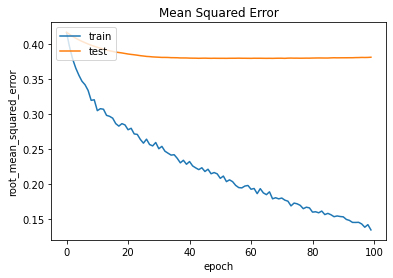

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan rekomendasi

In [ ]:
book = new_book
rating = rating

In [ ]:
userid = rating.userid.sample(1).iloc[0]
book_have_been_read_by_user = rating[rating.userid == userid]
 
book_have_not_been_read_by_user = book[book['book_ISBN'].isin(book_have_been_read_by_user.ISBN.values)]['book_ISBN'] 
book_have_not_been_read_by_user = list(
    set(book_have_not_been_read_by_user)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_have_not_been_read_by_user = [[book_to_book_encoded.get(x)] for x in book_have_not_been_read_by_user]
user_encoder = user_to_user_encoded.get(userid)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_have_not_been_read_by_user), book_have_not_been_read_by_user)
)

Memperoleh rekomendasi

In [ ]:
rating = model.predict(user_book_array).flatten()
 
top_rating_indices = rating.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_have_not_been_read_by_user[x][0]) for x in top_rating_indices
]
 
top_book_user = (
    book_have_been_read_by_user.sort_values(
        by = 'book_rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_rows = book[book['book_ISBN'].isin(top_book_user)]
for row in book_rows.itertuples():
    print(row.book_title, ':', row.book_author)
 
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_books = book[book['book_ISBN'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row.book_title, ':', row.book_author)

Politically Correct Bedtime Stories: Modern Tales for Our Life and Times : James Finn Garner
La Sombra del Viento : Carlos Ruiz Zafon
--------------------------------
Top 10 book recommendation
--------------------------------
Heart of Darkness (Wordsworth Collection) : Joseph Conrad
Alice's Adventures in Wonderland and Through the Looking Glass : Lewis Carroll
The Lovely Bones: A Novel : Alice Sebold
The Da Vinci Code : Dan Brown
Politically Correct Bedtime Stories: Modern Tales for Our Life and Times : James Finn Garner
Quidditch Through the Ages : J. K. Rowling
No Pasaran! El Videojuego : Chrstine Lehmann
The Restaurant at the End of the Universe (Hitchhiker's Trilogy (Paperback)) : Douglas Adams
Q : Luther Blissett
La Sombra del Viento : Carlos Ruiz Zafon


#Evaluation

In [ ]:
books_that_have_been_read_row = book[book.book_title == item_book]
books_that_have_been_read_author = books_that_have_been_read_row.iloc[0]["book_author"]

In [ ]:
book_recommendation_authors = recommend.book_author

In [ ]:
real_author = 0
for i in range(5):
    if book_recommendation_authors[i] == books_that_have_been_read_author:
        real_author+=1

In [ ]:
Accuracy = real_author/5*100
print("Accuracy of the model is {}%".format(Accuracy))

Accuracy of the model is 0.0%
